# Parte 2 - Hidrograma Unitário

## Definições preliminares

In [1]:
import numpy as np
import pandas as pd
import scipy.integrate as integrate

### Núcleo do hidrograma

$$ \mu(t-\tau) = \frac{1}{K} e^{\frac{-t}{K}} $$

In [2]:
mu = lambda tau, t, K : np.e**(-(t-tau)/K) / K

In [45]:
def calc_hu(t, K, P):
    """Calcula o hidrograma unitário de uma bacia, cujo
    núcleo é dado por exp(-t/K) / K
    
    Entrada
    -------
        t : lista com as t ordenadas temporais NÃO começando em 0
            Dt deve ser unitário (passo de uma hora)
        K : parâmetro do modelo
        P : lista com as precipitações correspondentes a t
    
    Retorno
    -------
        hidrograma : DataFrame com índice t e colunas HU [1/h] e Q [mm/h]    
    
    """
    # variáveis auxiliares
    Q = []  # lista com ordenadas do hidrograma
    HU = []  # lista com ordenadas do HU
    t = [t[0] - 1] + t  # adicionando 

    # para todos os instantes de tempo
    for i in range(1, len(t)):
        q = 0  # vazão no instante i
#         hu_ac = 0  # ordenada acumulada do HU para P unitário

        for j in range(i):  # para todos os instantes até i
            hu = integrate.quad(mu, t[j], t[j+1], args=(t[i], K))[0]
            q += hu * P[j]  # mm/h
#             hu_ac += hu 

        # armazenamento do valor
        Q.append(round(q,2))
        HU.append(hu)

    # organização da saída
    hidrograma = pd.DataFrame(
        data={"t": t[1:], "HU": HU, "Q": Q},
    )
    hidrograma = hidrograma.set_index("t")
    
    return hidrograma

## Questão 1 (Exemplo 4.4, adaptado de TUCCI, 2005)
O HUI de uma bacia hidrográfica é dado por: $$ \mu(t) = \dfrac{e^{\frac{-t}{2}}}{2}. $$
Determinar a vazão para $t$ = 1h, $t$ = 2h e $t$ = 3h devido a uma precipitação efetiva com:

* intensidade constante de 12 mm/h para o intervalo [0, 2h];

In [38]:
K = 2  # parâmetro do modelo
t = [1, 2, 3]  # tempo
P = [12, 12, 0]  # precipitação

In [39]:
hu = calc_hu(t, K, P)
hu = hu.drop(labels="HU", axis=1)
hu

,Q
t,
1,4.72
2,7.59
3,4.60


* intensidades constantes de 10 mm/h para o intervalo [0, 1h], 8 mm/h para o intervalo (1h, 2h] e 6 mm/h para o intervalo (2h, 3h].

In [40]:
P = [10, 8, 6]

In [41]:
hu = calc_hu(t, K, P)
hu = hu.drop(labels="HU", axis=1)
hu

,Q
t,
1,3.93
2,5.53
3,5.72


## Questão 2 (Exemplo 4.6, adaptado de TUCCI, 2005).
Dada a função núcleo:
$$ \mu(t) = \dfrac{e^{\frac{-t}{K}}}{K}, $$
onde $K$ é uma constante, pede-se: 

* calcular a função HU, considerando período unitário ($\Delta t$) = 2h e $K$ = 3h;

In [3]:
K = 3

* determinar as ordenadas do HU para $t$ variando entre 1h e 20h com discretização temporal de 1h;

In [4]:
t = [i for i in range(1, 21)]
P = [1] * 20

In [5]:
# variáveis auxiliares
Q = []  # lista com ordenadas do hidrograma
HU = []  # lista com ordenadas do HU
t = [t[0] - 1] + t  # adicionando 

In [18]:
# para todos os instantes de tempo
for i in range(1, len(t)):
    q = 0  # vazão no instante i
    hu_ac = 0

    for j in range(i):  # para todos os instantes até i
        hu = integrate.quad(mu, t[j], t[j+1], args=(t[i], K))[0]
        q += hu * P_atual[j]  # mm/h
        hu_ac += hu

    # armazenamento do valor
    Q.append(round(q,2))
    HU.append(hu_ac)

# organização da saída
hidrograma = pd.DataFrame(
    data={"t": t[1:], "HU": HU, "Q": Q},
)
hidrograma = hidrograma.set_index("t")

ValueError: arrays must all be same length

In [49]:
hu = calc_hu(t, K, P)
hu = hu.drop(labels="HU", axis=1)
hu

,Q
t,
1,0.28
2,0.49
3,0.63
4,0.74
5,0.81
6,0.86
7,0.90
8,0.93
9,0.95


* verificar se a soma das ordenadas do HU, calculadas no item anterior, converge para o volume unitário.

In [3]:
import matplotlib.pyplot as plt

In [5]:
k1 = [
    0,
    0.31606028,
    0.43233236,
    0.15904619,
    0.05850982,
    0.02152456,
    0.00791844,
    0.00291303,
    0.00107164,
    0.00039424,
    0.00014503,
    0.00005335,
    0.00001963,
    0.00000722,
    0.00000266,
    0.00000098,
    0.00000036,
    0.00000013,
    0.00000005,
    0.00000002,
    0.00000001,
]

k2 = [
    0,
    0.19673467,
    0.31606028,
    0.19170025,
    0.11627208,
    0.07052258,
    0.04277411,
    0.02594381,
    0.01573571,
    0.00954419,
    0.00578885,
    0.00351111,
    0.00212960,
    0.00129167,
    0.00078344,
    0.00047518,
    0.00028821,
    0.00017481,
    0.00010603,
    0.00006431,
    0.00003900,
]

k3 = [
    0,
    0.14173434,
    0.24329144,
    0.17432593,
    0.12490999,
    0.08950192,
    0.06413093,
    0.04595182,
    0.03292592,
    0.02359245,
    0.01690473,
    0.01211277,
    0.00867918,
    0.00621890,
    0.00445604,
    0.00319289,
    0.00228781,
    0.00163928,
    0.00117460,
    0.00084164,
    0.00060306,
]

k5 = [
    0,
    0.09063462,
    0.16483998,
    0.13495956,
    0.11049554,
    0.09046610,
    0.07406738,
    0.06064124,
    0.04964885,
    0.04064904,
    0.03328062,
    0.02724786,
    0.02230866,
    0.01826479,
    0.01495395,
    0.01224325,
    0.01002393,
    0.00820690,
    0.00671924,
    0.00550125,
    0.00450404,
]

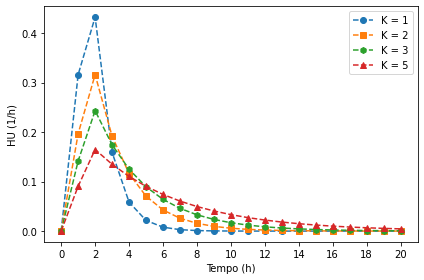

In [7]:
plt.plot(range(0,21), k1, "--o", label="K = 1")
plt.plot(range(0,21), k2, "--s", label="K = 2")
plt.plot(range(0,21), k3, "--h", label="K = 3")
plt.plot(range(0,21), k5, "--^", label="K = 5")
plt.xlabel("Tempo (h)")
plt.xticks(range(0,21,2))
plt.ylabel("HU (1/h)")
plt.legend()
plt.tight_layout()
plt.savefig("lista_2_ex3.png", format="png", dpi=300)
plt.show()